In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#讀取資料集
import pandas as pd
import numpy as np
import re
import string
df=pd.read_csv('/content/drive/MyDrive/守燦_碩士論文實作/ISOT/ISOT_EDA.csv')
display(df)

,title,text,label
0,Puerto Rico says will default on $779 million ...,SAN JUAN (Reuters) - Puerto Rico on Friday sai...,0
1,Czech ANO party dips but keeps commanding lead...,PRAGUE (Reuters) - Support for billionaire And...,0
2,LOL! SNARKY WHITE YAHOO Sports Writer TRASHES ...,How very bold of the white Yahoo sports writer...,1
3,Jimmy Kimmel Joins The Ladies Of ‘The View’ T...,Ever since we ve heard the news of Donald Trum...,1
4,MUSLIM ATHLETE Given “Hero’s Welcome” ARRESTED...,An Indian athlete who overcame a visa denial w...,1
...,...,...,...
44893,Congressional Black Caucus Cries Foul Over Su...,"Earlier this week, following Hillary Clinton s...",1
44894,BUSTED! GUESS WHO DEFENDED The Senate’s Role I...,THE MAIN STREAM MEDIA CHOOSES to ignore the fa...,1
44895,THIS PICTURE OF HARRIET TUBMAN Should Be Used ...,Obama has filled his cabinet with radical yes...,1
44896,AWESOME! UK LEADER: Nothing on Earth could eve...,,1


In [3]:
#觀察標題的敘述統計量
titles = [text for text in df.title]
max_len = 0
titles_len = []
for title in titles:
    titles_len.append(len(title.split()))
    max_len = max(len(title.split()), max_len)

print('Number of titles:', len(titles))
print('Max length of the titles:', max_len)
print('Mean length of the titles:', np.mean(titles_len))

Number of titles: 44898
Max length of the titles: 42
Mean length of the titles: 12.453472315025168


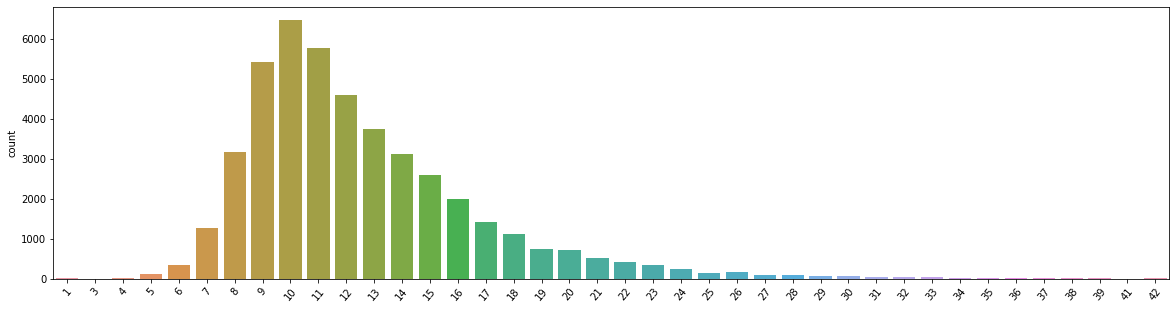

In [4]:
#可視化標題字數的平均次數
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,5))
g = sns.countplot(x=titles_len)
g.set_xticklabels(g.get_xticklabels(), rotation=50)
plt.show()

In [5]:
#內文的平均長度
texts = [text for text in df.text]
max_len = 0
texts_len = []
for text in texts:
    texts_len.append(len(text.split()))
    max_len = max(len(text.split()), max_len)
print('Mean length of the texts:', np.mean(texts_len))

Mean length of the texts: 405.28228428883244


In [6]:
#打散資料集的順序
from sklearn.utils import shuffle
df = df.drop(['text'],axis=1)
df = shuffle(df).reset_index(drop=True)
display(df)

,title,label
0,"Trump, on CNN, faults Muslim community for not...",0
1,Philippine police chief defends deadly drug wa...,0
2,"On TV, France's Macron looks to style, viewers...",0
3,What Dan Rather Has To Say About Trump’s ‘Dea...,1
4,SHE GOT “SPICED”! SEAN SPICER SHUTS DOWN Repor...,1
...,...,...
44893,LOL! ARROGANT OBAMA BEGS Congress To Save Emba...,1
44894,"So, About That ‘Stand Down’ Order In Benghazi...",1
44895,While The World Is Freaking The Hell Out Trum...,1
44896,Senate committee advances bill easing banking ...,0


In [7]:
#字詞正則化
def irrelevant(text):
    return re.sub('[^a-zA-Z0-9]',' ',text)
df['title']=df['title'].apply(irrelevant)
print(df['title'].head())

0    Trump  on CNN  faults Muslim community for not...
1    Philippine police chief defends deadly drug wa...
2    On TV  France s Macron looks to style  viewers...
3     What Dan Rather Has To Say About Trump s  Dea...
4    SHE GOT  SPICED   SEAN SPICER SHUTS DOWN Repor...
Name: title, dtype: object


In [8]:
#將字母轉換為小寫
def lowering(text):
    return str(text).lower()
df['title']=df['title'].apply(lowering)
print(df['title'].head())

0    trump  on cnn  faults muslim community for not...
1    philippine police chief defends deadly drug wa...
2    on tv  france s macron looks to style  viewers...
3     what dan rather has to say about trump s  dea...
4    she got  spiced   sean spicer shuts down repor...
Name: title, dtype: object


In [9]:
#分割資料集(訓練:60%、測試:20%、驗證20%)
train,validate,test=np.split(df.sample(frac=1),[int(.6*len(df)), int(.8*len(df))])
train_df=train.reset_index(drop=True)
val_df=validate.reset_index(drop=True)
test_df=test.reset_index(drop=True)
print('訓練集維度: ',train_df.shape)
print('測試集維度: ',val_df.shape)
print('驗證集維度: ',test_df.shape)

訓練集維度:  (26938, 2)
測試集維度:  (8980, 2)
驗證集維度:  (8980, 2)


In [10]:
#將所有資料集另存
train_df.to_csv('train.tsv', sep='\t', index=False)
val_df.to_csv('val.tsv', sep='\t', index=False)
test_df.to_csv('test.tsv', sep='\t', index=False)
df = pd.concat([train_df, val_df, test_df])
display(df)

,title,label
0,u n launches new plan to end libya s post rev...,0
1,factbox five facts about mike pompeo expecte...,0
2,in parting words sec s white calls for regula...,0
3,us police dept uses pok mon go to lure fugit...,1
4,gop lawmaker links abortion to the economy in...,1
...,...,...
8975,neutral elizabeth warren s upcoming endorse...,1
8976,panama recalls eu ambassador over tax haven list,0
8977,us hostage survives terrorist ordeal in syria ...,1
8978,trump points to congress on puerto rico assist...,0


In [11]:
#安裝BERT套件
!pip install transformers
import torch
from transformers import BertTokenizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 95.1 MB/s eta 0:00:00


In [12]:
#載入預訓練模型
PRETRAINED_MODEL_NAME = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(PRETRAINED_MODEL_NAME)

In [13]:
#載入檔案至BERT預訓練模型當中
from torch.utils.data import Dataset
class FakeNewsDataset(Dataset):
    def __init__(self, mode, tokenizer):
        assert mode in ['train', 'val', 'test']
        self.mode = mode
        self.df = pd.read_csv(mode + '.tsv', sep='\t').fillna("")
        self.len = len(self.df)
        self.tokenizer = tokenizer  # BERT tokenizer
    
    # 定義回傳一筆訓練 / 測試數據的函式
    def __getitem__(self, idx):
        if self.mode == 'test':
            statement, label = self.df.iloc[idx, :].values
            label_tensor = torch.tensor(label)
        else:
            statement, label = self.df.iloc[idx, :].values
            label_tensor = torch.tensor(label)
            
        # 建立第一個句子的 BERT tokens 並加入分隔符號 [SEP]
        word_pieces = ['[CLS]']
        statement = self.tokenizer.tokenize(statement)
        word_pieces += statement + ['[SEP]']
        len_st = len(word_pieces)
        
#         # 第二個句子的 BERT tokens
#         tokens_b = self.tokenizer.tokenize(text_b)
#         word_pieces += tokens_b + ["[SEP]"]
#         len_b = len(word_pieces) - len_a
        
        # 將整個 token 序列轉換成索引序列
        ids = self.tokenizer.convert_tokens_to_ids(word_pieces)
        tokens_tensor = torch.tensor(ids)
        
        # 將第一句包含 [SEP] 的 token 位置設為 0
        segments_tensor = torch.tensor([0] * len_st, dtype=torch.long)
        
        return (tokens_tensor, segments_tensor, label_tensor)
    
    def __len__(self):
        return self.len
    
    
# Initialize Datasets for Transformation
trainset = FakeNewsDataset('train', tokenizer=tokenizer)
valset = FakeNewsDataset('val', tokenizer=tokenizer)
testset = FakeNewsDataset('test', tokenizer=tokenizer)

print('trainset size:' ,trainset.__len__())
print('valset size:',valset.__len__())
print('testset size: ',testset.__len__())

trainset size: 26938
valset size: 8980
testset size:  8980


In [14]:
#觀察原文與經過變換器轉換的tensor
# 選擇第一個樣本
sample_idx = 8

# 將原始文本拿出做比較
statement, label = trainset.df.iloc[sample_idx].values

# 利用剛剛建立的 Dataset 取出轉換後的 id tensors
tokens_tensor, segments_tensor, label_tensor = trainset[sample_idx]

# 將 tokens_tensor 還原成文本
tokens = tokenizer.convert_ids_to_tokens(tokens_tensor.tolist())
combined_text = " ".join(tokens)

# 渲染前後差異，毫無反應就是個 print。可以直接看輸出結果
print(f"""
original_statement: 
{statement}

tokens: 
{tokens}

label: {label}

--------------------

tokens_tensor: 
{tokens_tensor}

segments_tensor: 
{segments_tensor}

label_tensor: 
{label_tensor}

""")


original_statement: 
kathy griffin loses cnn deal after photos with fake severed trump head

tokens: 
['[CLS]', 'kathy', 'griffin', 'loses', 'cnn', 'deal', 'after', 'photos', 'with', 'fake', 'severed', 'trump', 'head', '[SEP]']

label: 0

--------------------

tokens_tensor: 
tensor([  101, 14986,  9258, 12386, 13229,  3066,  2044,  7760,  2007,  8275,
        16574,  8398,  2132,   102])

segments_tensor: 
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

label_tensor: 
0




In [15]:
#重新建構資料並擬和模型
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence

# 這個函式的輸入 `samples` 是一個 list，裡頭的每個 element 都是
# 剛剛定義的 `FakeNewsDataset` 回傳的一個樣本，每個樣本都包含 3 tensors：
# - tokens_tensor
# - segments_tensor
# - label_tensor
# 它會對前兩個 tensors 作 zero padding，並產生前面說明過的 masks_tensors
def create_mini_batch(samples):
    tokens_tensors = [s[0] for s in samples]
    segments_tensors = [s[1] for s in samples]
    
    # 測試集有 labels
    if samples[0][2] is not None:
        label_ids = torch.stack([s[2] for s in samples])
    else:
        label_ids = None
    
    # Zero Padding
    tokens_tensors = pad_sequence(tokens_tensors, batch_first=True)
    segments_tensors = pad_sequence(segments_tensors, batch_first=True)
    
    # attention masks，將 tokens_tensors 裡頭不為 zero padding
    # 的位置設為 1 讓 BERT 只關注這些位置的 tokens
    masks_tensors = torch.zeros(tokens_tensors.shape, dtype=torch.long)
    masks_tensors = masks_tensors.masked_fill(tokens_tensors != 0, 1)
    
    return tokens_tensors, segments_tensors, masks_tensors, label_ids


# 初始化一個每次回傳 16 個訓練樣本的 DataLoader
# 利用 `collate_fn` 將 list of samples 合併成一個 mini-batch 是關鍵
BATCH_SIZE = 16
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, collate_fn=create_mini_batch)
valloader = DataLoader(valset, batch_size=BATCH_SIZE, collate_fn=create_mini_batch)
testloader = DataLoader(testset, batch_size=BATCH_SIZE,collate_fn=create_mini_batch)

In [16]:
#觀察DataLoader當中所有tensor的元素與維度
data = next(iter(trainloader))

tokens_tensors, segments_tensors, masks_tensors, label_ids = data

print(f"""
tokens_tensors.shape   = {tokens_tensors.shape} 
{tokens_tensors}
------------------------
segments_tensors.shape = {segments_tensors.shape}
{segments_tensors}
------------------------
masks_tensors.shape    = {masks_tensors.shape}
{masks_tensors}
------------------------
label_ids.shape        = {label_ids.shape}
{label_ids}
""")


tokens_tensors.shape   = torch.Size([16, 31]) 
tensor([[  101,  1057,  1050, 18989,  2047,  2933,  2000,  2203, 12917,  1055,
          2695,  4329, 17930,   102,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0],
        [  101,  2755,  8758,  2274,  8866,  2055,  3505, 13433,  8737,  8780,
          3517,  2000,  5672,  6229, 18617,   102,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0],
        [  101,  1999, 20254,  2616, 10819,  1055,  2317,  4455,  2005, 21618,
          2000,  4468,  2576, 19960, 14423,   102,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0],
        [  101,  2149,  2610, 29466,  3594, 13433,  2243, 12256,  2175,  2000,
         17256, 21329,  2015,  2000,  2610,  2276,   102,     0,     0,     0,
             0,     0,     0,   

In [17]:
#建立BERT模型
from transformers import BertForSequenceClassification
from IPython.display import display, clear_output

PRETRAINED_MODEL_NAME = "bert-base-uncased"
NUM_LABELS = 2

model = BertForSequenceClassification.from_pretrained(
    PRETRAINED_MODEL_NAME, num_labels=NUM_LABELS)

clear_output()

# high-level 顯示此模型裡的 modules
print("""
name             module
-----------------------""")
for name, module in model.named_children():
    if name == "bert":
        for n, _ in module.named_children():
            print(f"{name}:{n}")
    else:
        print("{:16} {}".format(name, module))


name             module
-----------------------
bert:embeddings
bert:encoder
bert:pooler
dropout          Dropout(p=0.1, inplace=False)
classifier       Linear(in_features=768, out_features=2, bias=True)


In [18]:
#顯示BERT模型使用的config細節
model.config

BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.26.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [19]:
#BERT模型微調優化與訓練
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device:", device)
model = model.to(device)

model.train()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
NUM_EPOCHS =3

for epoch in range(NUM_EPOCHS):
    train_loss = 0.0
    train_acc = 0.0

    loop = tqdm(trainloader)
    for batch_idx, data in enumerate(loop):
        tokens_tensors, segments_tensors, masks_tensors, labels = [t.to(device) for t in data]

        # 將參數梯度歸零
        optimizer.zero_grad()
        
        outputs = model(input_ids=tokens_tensors, 
                        token_type_ids=segments_tensors, 
                        attention_mask=masks_tensors, 
                        labels=labels)

        loss = outputs[0]
        loss.backward()
        optimizer.step()

        logits = outputs[1]
        _, pred = torch.max(logits.data, 1)
        train_acc = accuracy_score(pred.cpu().tolist() , labels.cpu().tolist())

        # 紀錄當前 batch loss
        train_loss += loss.item()

        # if batch_idx == len(trainloader)-1:
        #     _, acc = get_predictions(model, trainloader, compute_acc=True)

        loop.set_description(f"Epoch [{epoch+1}/{NUM_EPOCHS}]")
        loop.set_postfix(acc = train_acc, loss = train_loss)

device: cuda:0


  0%|          | 0/1684 [00:00<?, ?it/s]

  0%|          | 0/1684 [00:00<?, ?it/s]

  0%|          | 0/1684 [00:00<?, ?it/s]

In [20]:
#儲存訓練完成的模型
torch.save(model, './best_model.pth')
print('Model saved!')

Model saved!


In [21]:
#模型績效評估:應用測試集真實值和模型預測值
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
true=[]
predictions=[]
with torch.no_grad():
    model.eval()
    for data in testloader:
        if next(model.parameters()).is_cuda:
            data = [t.to(device) for t in data if t is not None]
            
        tokens_tensors, segments_tensors, masks_tensors = data[:3]
        test_outputs = model(input_ids=tokens_tensors, 
                    token_type_ids=segments_tensors, 
                    attention_mask=masks_tensors)

        logits = test_outputs[0]
        _, pred = torch.max(logits.data, 1)

        labels = data[3]
        true.extend(labels.cpu().tolist())
        predictions.extend(pred.cpu().tolist())

In [22]:
#產生真實標籤與預測標籤報表
df = pd.DataFrame({"predict_label": predictions})
df_test = pd.concat([testset.df.loc[:, ['title']], 
                          testset.df.loc[:, ['label']], 
                          df.loc[:, 'predict_label']], axis=1)
test_report=df_test.to_excel("report.xlsx")

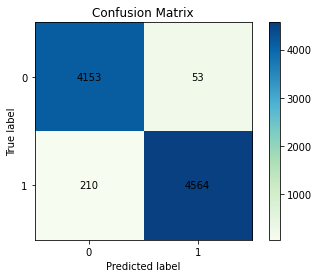

In [23]:
#繪製混淆矩陣
def plot_confusion_matrix(confusion_mat):
    plt.imshow(confusion_mat,interpolation='nearest',cmap=plt.cm.GnBu)
    plt.colorbar()
    for x in range(len(confusion_mat)):
        for y in range(len(confusion_mat)):
            plt.annotate(confusion_mat[x, y], xy=(x, y),horizontalalignment='center',verticalalignment='center')
    plt.title('Confusion Matrix')    
    plt.ylabel('True label')         
    plt.xlabel('Predicted label')     
    tick_marks = np.arange(2)
    plt.xticks(tick_marks,tick_marks)
    plt.yticks(tick_marks,tick_marks)
    plt.show()
from sklearn import metrics
confusion_mat=metrics.confusion_matrix(df_test.label, df_test.predict_label,labels=None,sample_weight=None)
plot_confusion_matrix(confusion_mat)

In [24]:
#產生分類報告
from sklearn.metrics import classification_report
print(classification_report(df_test.label, df_test.predict_label,digits=4))

              precision    recall  f1-score   support

           0     0.9874    0.9519    0.9693      4363
           1     0.9560    0.9885    0.9720      4617

    accuracy                         0.9707      8980
   macro avg     0.9717    0.9702    0.9707      8980
weighted avg     0.9713    0.9707    0.9707      8980



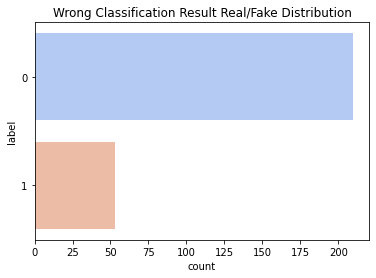

In [25]:
#找出分類錯誤的label並視覺化
wrong_df = df_test[df_test.label != df_test.predict_label]
sns.countplot(y="label", palette="coolwarm", data=wrong_df).set_title('Wrong Classification Result Real/Fake Distribution')
plt.show()

In [26]:
#找出分類錯誤的文章
wrong_titles=df_test[df_test.label != df_test.predict_label].title.values
wrong_titles=pd.DataFrame(wrong_titles)
wrong_report=wrong_titles.to_excel("ISOT_WrongArticle.xlsx")